### build 2D CNN (modified pattern from https://keras.io/examples/cifar10_cnn)

In [1]:
# import general dependencies
from matplotlib import pyplot
import numpy as np
import os
import pandas as pd

In [2]:
# import ML dependencies
from __future__ import print_function
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

Using TensorFlow backend.


In [3]:
# define model vars
intBatchSize = 110
intClassCount = 1
intEpochCount = 5 # originally 100
fDataAug = True
intPredictionCount = 1
strPath = '.'
strModel = 'CIFAR10Style_doctordata_MyCity.h5'

In [4]:
# create X data set
strImgPath = '../ek_scrape/img/doctordata/MyCity'
lstImg = []
for root, dirs, lstFile in os.walk(strImgPath):
    lstFile.sort(key=str.lower)
    for strFile in lstFile:
        if strFile[-4:] == '.png':
            print(strFile)
            img = pyplot.imread(strImgPath + '/' + strFile, format='jpg')
            arrImg = image.img_to_array(img)
            lstImg.append(arrImg)
arrX = np.array(lstImg)
arrX.shape

AllieKat1070.00.png
AllieKat1070.01.png
amunyque71.00.png
amunyque71.01.png
amunyque71.02.png
amunyque71.03.png
amunyque71.04.png
amunyque71.05.png
antonia_men.00.png
antonia_men.01.png
antonia_men.02.png
antonia_men.03.png
antonia_men.04.png
antonia_men.05.png
BeePatient.00.png
BeePatient.01.png
BeePatient.02.png
BeePatient.03.png
BeePatient.04.png
BeePatient.05.png
candipie1989.00.png
candipie1989.01.png
candipie1989.02.png
candipie1989.03.png
candipie1989.04.png
candipie1989.05.png
candipie1989.06.png
carmelreed.00.png
carmelreed.01.png
carmelreed.02.png
carmelreed.03.png
carmelreed.04.png
carmelreed.05.png
cherryandsandy.00.png
chloe0219.00.png
chloe0219.01.png
chloe0219.02.png
chloe0219.03.png
chloe0219.04.png
chloe0219.05.png
chloe0219.06.png
chloe0219.07.png
consuelocast.00.png
cristinabele.00.png
cristinabele.01.png
danigirl1234e.00.png
danigirl1234e.01.png
danigirl1234e.02.png
danigirl1234e.03.png
Erickadh2.00.png
Erickadh2.01.png
Erickadh2.02.png
GeekyLonghorn.00.png
GeekyLon

(226, 110, 110, 3)

In [5]:
# create Y data set
dfY = pd.read_csv('doctordata_MyCity.csv')
arrY = np.array(dfY['interested'])
arrY.shape
arrY.ndim
arrY.shape

(226,)

In [6]:
# create Train and Test datasets
arrTrainX, arrTestX, arrTrainY, arrTestY = train_test_split(arrX, arrY, random_state=17, stratify=arrY)

In [7]:
# create model
# IMPORTANT: for a single yes/no decision, activation is sigmoid, not softmax
# see https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=arrTrainX.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(intClassCount))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [9]:
# train the model using RMSprop
# IMPORTANT: for a single yes/no decision, loss is binary_crossentropy, not categorical_crossentropy
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [10]:
# rescale X's Train and Test datasets
arrTrainX = arrTrainX.astype('float32')
arrTestX = arrTestX.astype('float32')
arrTrainX /= 255
arrTestX /= 255

In [11]:
if not fDataAug:
    print('Not using data augmentation.')
    model.fit(arrTrainX, arrTrainY,
              batch_size=intBatchSize,
              epochs=intEpochCount,
              validation_data=(arrTestX, arrTestY),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

Using real-time data augmentation.


In [12]:
# compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(arrTrainX)

In [13]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(arrTrainX, arrTrainY,
                                 batch_size=intBatchSize),
                    epochs=intEpochCount,
                    validation_data=(arrTestX, arrTestY),
                    workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
2/2 [==============================] - 6s 3s/step - loss: 0.6632 - accuracy: 0.6450 - val_loss: 0.4729 - val_accuracy: 0.8421
Epoch 2/5
2/2 [==============================] - 6s 3s/step - loss: 0.4511 - accuracy: 0.8521 - val_loss: 0.5384 - val_accuracy: 0.8421
Epoch 3/5
2/2 [==============================] - 5s 3s/step - loss: 0.4469 - accuracy: 0.8521 - val_loss: 0.4870 - val_accuracy: 0.8421
Epoch 4/5
2/2 [==============================] - 6s 3s/step - loss: 0.4418 - accuracy: 0.8521 - val_loss: 0.5176 - val_accuracy: 0.8421
Epoch 5/5
2/2 [==============================] - 6s 3s/step - loss: 0.4502 - accuracy: 0.8521 - val_loss: 0.5029 - val_accuracy: 0.8421


In [14]:
# save model and weights
if not os.path.isdir(strPath):
    os.makedirs(strPath)
strModelPath = os.path.join(strPath, strModel)
model.save(strModelPath)
print('Saved trained model at %s ' % strModelPath)

Saved trained model at .\CIFAR10Style_doctordata_MyCity.h5 


In [15]:
# score trained model
arrScores = model.evaluate(arrTestX, arrTestY, verbose=1)
arrPredict = model.predict(arrTestX)
print('Test loss:', arrScores[0])
print('Test accuracy:', arrScores[1])

57/57 [==============================] - 1s 10ms/step
Test loss: 0.5029186961943644
Test accuracy: 0.8421052694320679


In [16]:
arrPredict

array([[0.28755337],
       [0.21264961],
       [0.28810474],
       [0.28345698],
       [0.25520894],
       [0.3084581 ],
       [0.36737156],
       [0.29039395],
       [0.23479307],
       [0.3209259 ],
       [0.22688168],
       [0.26744217],
       [0.32386607],
       [0.29057747],
       [0.32881096],
       [0.35536033],
       [0.24457598],
       [0.23376852],
       [0.29533643],
       [0.33473772],
       [0.45336986],
       [0.3772944 ],
       [0.2425704 ],
       [0.2849877 ],
       [0.3437298 ],
       [0.2975517 ],
       [0.33010602],
       [0.29244453],
       [0.2760588 ],
       [0.35452026],
       [0.25368965],
       [0.3003095 ],
       [0.2809309 ],
       [0.3508277 ],
       [0.2905314 ],
       [0.28023958],
       [0.27860963],
       [0.3011898 ],
       [0.21182269],
       [0.31309834],
       [0.30001464],
       [0.30841428],
       [0.2658717 ],
       [0.22806054],
       [0.2866944 ],
       [0.27965146],
       [0.2820909 ],
       [0.296

In [17]:
for foo in range(0, arrTestY.size):
    print(f'{foo}: {arrTestY[foo]}')
    image.array_to_img(arrTestX[foo])

0: 0
1: 0
2: 0
3: 1
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 1
12: 0
13: 0
14: 0
15: 0
16: 1
17: 1
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 1
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 0
32: 0
33: 0
34: 0
35: 0
36: 0
37: 0
38: 0
39: 0
40: 0
41: 0
42: 0
43: 1
44: 0
45: 0
46: 0
47: 0
48: 1
49: 1
50: 1
51: 0
52: 0
53: 0
54: 0
55: 0
56: 0


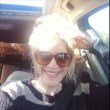

In [18]:
image.array_to_img(arrTestX[43])

In [19]:
for foo in range(0, arrY.size-1):
    print(f'{foo}: {arrY[foo]}')

0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 1
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 0
32: 0
33: 0
34: 1
35: 1
36: 0
37: 1
38: 1
39: 0
40: 0
41: 1
42: 0
43: 0
44: 0
45: 0
46: 0
47: 0
48: 0
49: 0
50: 0
51: 0
52: 0
53: 0
54: 0
55: 0
56: 0
57: 0
58: 0
59: 1
60: 1
61: 0
62: 1
63: 1
64: 0
65: 1
66: 1
67: 0
68: 1
69: 1
70: 0
71: 1
72: 1
73: 0
74: 0
75: 0
76: 1
77: 1
78: 0
79: 1
80: 0
81: 0
82: 0
83: 0
84: 0
85: 0
86: 0
87: 0
88: 0
89: 0
90: 0
91: 0
92: 0
93: 0
94: 0
95: 1
96: 1
97: 0
98: 0
99: 0
100: 0
101: 0
102: 0
103: 0
104: 0
105: 1
106: 0
107: 0
108: 0
109: 0
110: 0
111: 0
112: 0
113: 0
114: 0
115: 0
116: 0
117: 0
118: 0
119: 0
120: 1
121: 1
122: 0
123: 0
124: 0
125: 0
126: 0
127: 0
128: 1
129: 1
130: 0
131: 1
132: 0
133: 1
134: 0
135: 0
136: 0
137: 1
138: 0
139: 0
140: 0
141: 0
142: 0
143: 0
144: 0
145: 0
146: 0
147: 0
148: 0
149: 0
150: 0
151: 0
152: 0
153: 1
154: 0
155: 0
156: 0
157: 0
158:

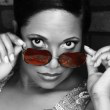

In [20]:
image.array_to_img(arrX[189])

In [22]:
model.predict_classes(arrTrainX)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    